In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Para el analisis EDA de nuestra tabla, haremos uso de **5** puntos importantes:


## **1. Estadistica descriptiva**
**Uso de medidas de tendencia central**
<br>Usaremos medidas como:
* Mediana
* Moda (valor que mas se repite)
* Media aritmetica(mean)

In [16]:
df_reviews = pd.read_parquet("clean_reviews.parquet")

In [4]:
df_reviews

,user_id,user_url,posted,item_id,recommend,review
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,2011-11-05,1250,True,1
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,2011-07-15,22200,True,1
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,2011-04-21,43110,True,1
3,js41637,http://steamcommunity.com/id/js41637,2014-06-24,251610,True,1
4,js41637,http://steamcommunity.com/id/js41637,2013-09-08,227300,True,1
...,...,...,...,...,...,...
59300,76561198312638244,http://steamcommunity.com/profiles/76561198312...,None,70,True,1
59301,76561198312638244,http://steamcommunity.com/profiles/76561198312...,None,362890,True,1
59302,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,None,273110,True,1
59303,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,None,730,True,2


**Usaremos el metodo describe para sacar todas la medidas posibles de cada elemento**
<br>
## `Dataframe.describe()`

In [5]:
df_reviews.describe(include='all')

,user_id,user_url,posted,item_id,recommend,review
count,59305,59305,49186,59305,59305,59305.000000
unique,25458,25458,1644,3682,2,NaN
top,76561198094665607,http://steamcommunity.com/profiles/76561198094...,2014-06-21,730,True,NaN
freq,20,20,225,3759,52473,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.149229
std,NaN,NaN,NaN,NaN,NaN,0.416454
min,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,1.000000
50%,NaN,NaN,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,NaN,NaN,1.000000


### Usamos el `include='all'` pues queremos saber las medidas de todas las variables, incluidas las categoricas

## **2. Outliers**


#### Para el tratamiento de outliers usaremos:

### `Dataframe.info()`

In [6]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59305 entries, 0 to 59304
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    59305 non-null  object
 1   user_url   59305 non-null  object
 2   posted     49186 non-null  object
 3   item_id    59305 non-null  object
 4   recommend  59305 non-null  bool  
 5   review     59305 non-null  int64 
dtypes: bool(1), int64(1), object(4)
memory usage: 2.3+ MB


### De un total de 59305 filas, la unica columna con valores nulos es la columna *posted*

In [7]:
# Observaremos que filas del dataframe son las que tienen valores nulos en "posted"

df_reviews[df_reviews["posted"].isnull()]

,user_id,user_url,posted,item_id,recommend,review
6,evcentric,http://steamcommunity.com/id/evcentric,None,248820,True,1
27,76561198079601835,http://steamcommunity.com/profiles/76561198079...,None,730,True,1
28,MeaTCompany,http://steamcommunity.com/id/MeaTCompany,None,730,True,2
31,76561198156664158,http://steamcommunity.com/profiles/76561198156...,None,252950,True,2
32,76561198077246154,http://steamcommunity.com/profiles/76561198077...,None,440,True,1
...,...,...,...,...,...,...
59300,76561198312638244,http://steamcommunity.com/profiles/76561198312...,None,70,True,1
59301,76561198312638244,http://steamcommunity.com/profiles/76561198312...,None,362890,True,1
59302,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,None,273110,True,1
59303,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,None,730,True,2


## **3.Distribucion de variables**

### **Cómo estan distribuidas las variables?**

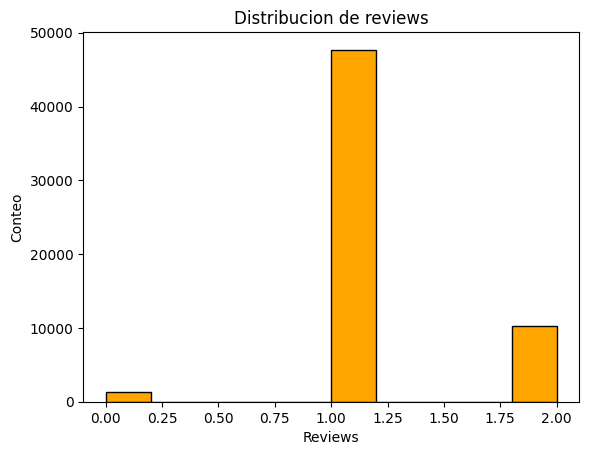

In [10]:
plt.hist(df_reviews["review"],color="orange",ec="black")
plt.title("Distribucion de reviews")
plt.xlabel("Reviews")
plt.ylabel("Conteo")
plt.show()

In [13]:
# Transformamos en su representacion numerica los valores de True y False

df_reviews["recommend"] = df_reviews["recommend"].apply(lambda x: 1 if x is True else 0 )

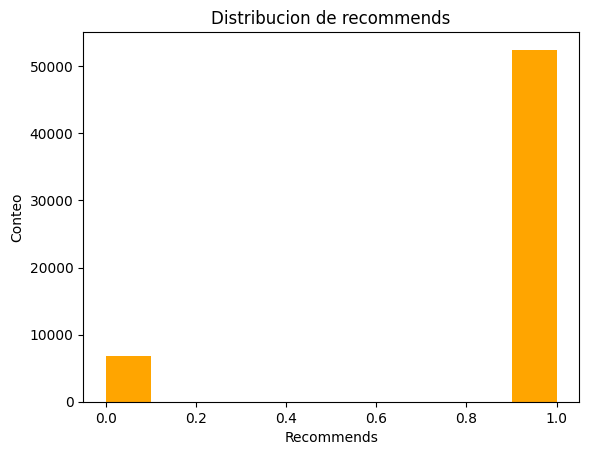

In [14]:
plt.hist(df_reviews["recommend"],color="orange")
plt.title("Distribucion de recommends")
plt.xlabel("Recommends")
plt.ylabel("Conteo")
plt.show()

### *Se eligio verificar la distribucion de las variables tanto en las columnas review y recommend, por el hecho de no ser consideradas variables categoricas*

## **4. Tratamiento de valores faltantes**

### *Usaremos un modelo de machine learning user-item based, donde se recomendara peliculas en funcion de usuarios con gustos similares*

### Teniendo en cuenta es informacion, usaremos para el modelo de recommendacion las columnas relevantes para nuestro modelo, tales como `item_id`,`user_id` y `review`

In [15]:
df_reviews.drop(["posted","user_url"],axis=1,inplace=True)
df_reviews

,user_id,item_id,recommend,review
0,76561197970982479,1250,1,1
1,76561197970982479,22200,1,1
2,76561197970982479,43110,1,1
3,js41637,251610,1,1
4,js41637,227300,1,1
...,...,...,...,...
59300,76561198312638244,70,1,1
59301,76561198312638244,362890,1,1
59302,LydiaMorley,273110,1,1
59303,LydiaMorley,730,1,2


## **5. Correlacion de variables**

### Veremos mediante una grafica si existe alguna correlacion entre las variables de nuestro dataframe

<Axes: >

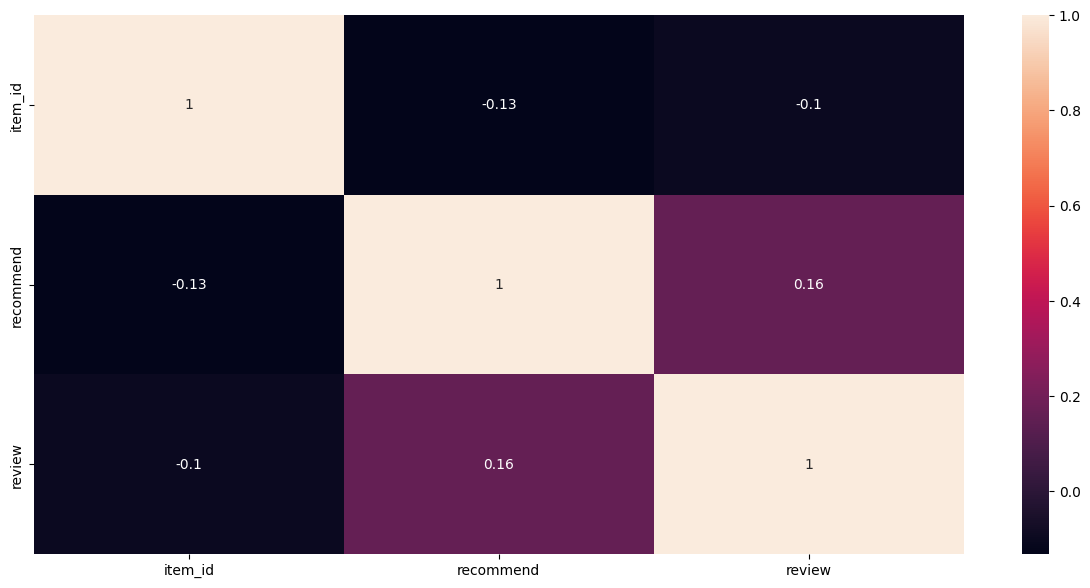

In [23]:
plt.figure(figsize=(15,7))
corr_matrix= df_reviews.loc[:,["item_id","recommend","review"]].corr()
sns.heatmap(corr_matrix, annot = True)

## **Es interesante notar que existe un correlacion positiva entre nuestras variables `recommend` y `review`**

### Eso significa que efectivamente  usaremos unicamente 3 columnas para el despliegue de nuestro modelo de machine learning